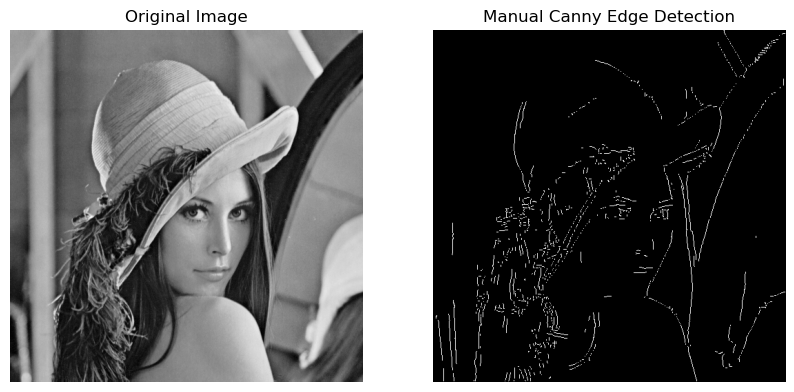

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def manual_canny(image_path, sigma=1.0, low_threshold=50, high_threshold=150):
    """Perform Canny edge detection manually using Sobel, NMS, and thresholding."""
    
    # Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), sigma)
    
    # Compute Sobel gradients
    Gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    Gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute Gradient Magnitude and Direction
    gradient_magnitude = np.hypot(Gx, Gy)
    gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255
    gradient_direction = np.arctan2(Gy, Gx) * (180 / np.pi)
    gradient_direction[gradient_direction < 0] += 180  # Normalize direction

    # Non-Maximum Suppression (NMS)
    nms = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            direction = gradient_direction[i, j]
            magnitude = gradient_magnitude[i, j]
            
            # Identify pixel neighbors based on gradient direction
            if (0 <= direction < 22.5) or (157.5 <= direction <= 180):
                before, after = gradient_magnitude[i, j-1], gradient_magnitude[i, j+1]
            elif (22.5 <= direction < 67.5):
                before, after = gradient_magnitude[i-1, j+1], gradient_magnitude[i+1, j-1]
            elif (67.5 <= direction < 112.5):
                before, after = gradient_magnitude[i-1, j], gradient_magnitude[i+1, j]
            elif (112.5 <= direction < 157.5):
                before, after = gradient_magnitude[i-1, j-1], gradient_magnitude[i+1, j+1]
            
            # Suppress non-maxima
            if magnitude >= before and magnitude >= after:
                nms[i, j] = magnitude
            else:
                nms[i, j] = 0

    # Double Thresholding
    strong_edges = (nms >= high_threshold).astype(np.uint8) * 255
    weak_edges = ((nms >= low_threshold) & (nms < high_threshold)).astype(np.uint8) * 255
    
    # Edge tracking by hysteresis
    edges = np.zeros_like(nms, dtype=np.uint8)
    strong_pixels = np.argwhere(strong_edges)
    
    for y, x in strong_pixels:
        edges[y, x] = 255
        
        # Check neighbors of strong edges
        neighbors = [
            (y-1, x-1), (y-1, x), (y-1, x+1),
            (y, x-1),             (y, x+1),
            (y+1, x-1), (y+1, x), (y+1, x+1)
        ]
        for ny, nx in neighbors:
            if (0 <= ny < nms.shape[0]) and (0 <= nx < nms.shape[1]):
                if weak_edges[ny, nx] == 255:
                    edges[ny, nx] = 255

    # Display the images using Matplotlib
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Manual Canny Edge Detection")
    plt.axis("off")

    plt.show()

# Run the function
manual_canny(r"D:\Lenna_(test_image).png",10,10,75)

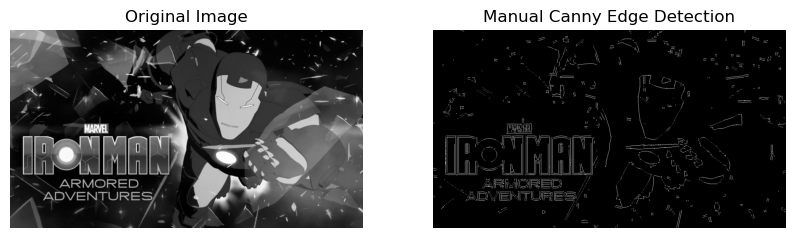

In [20]:
manual_canny(r"D:\scale.webp",10,10,75)

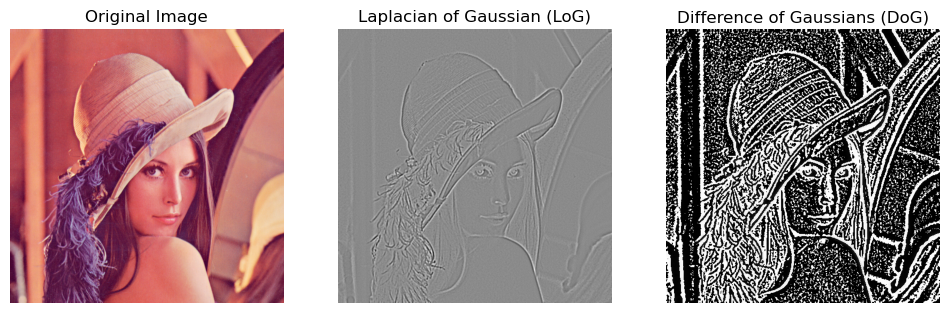

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_of_gaussian(image):
    """Apply Laplacian of Gaussian (LoG) edge detection."""
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Apply Laplacian
    log = cv2.Laplacian(blurred, cv2.CV_64F)
    
    return log

def difference_of_gaussians(image, sigma1=1.0, sigma2=2.0):
    """Apply Difference of Gaussians (DoG) edge detection."""
    # Convert to grayscale if needed
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur with two different sigmas
    gaussian1 = cv2.GaussianBlur(image, (0, 0), sigma1)
    gaussian2 = cv2.GaussianBlur(image, (0, 0), sigma2)
    
    # Compute Difference of Gaussians
    dog = gaussian1 - gaussian2
    
    return dog

def display_results(image):
    """Display original image, LoG, and DoG."""
    log_result = laplacian_of_gaussian(image)
    dog_result = difference_of_gaussians(image)
    
    # Plot the images
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(log_result, cmap="gray")
    plt.title("Laplacian of Gaussian (LoG)")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(dog_result, cmap="gray")
    plt.title("Difference of Gaussians (DoG)")
    plt.axis("off")
    
    plt.show()
    
image = cv2.imread(r"D:\Lenna_(test_image).png")  # Load an image
display_results(image)



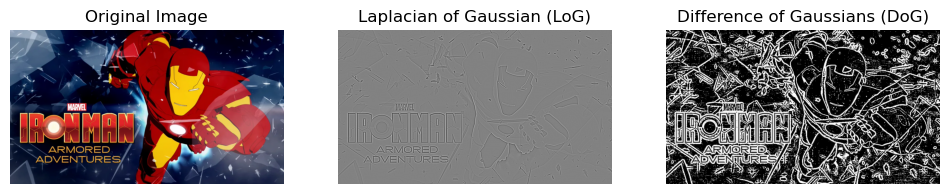

In [27]:
image = cv2.imread(r"D:\scale.webp")  # Load an image
display_results(image)

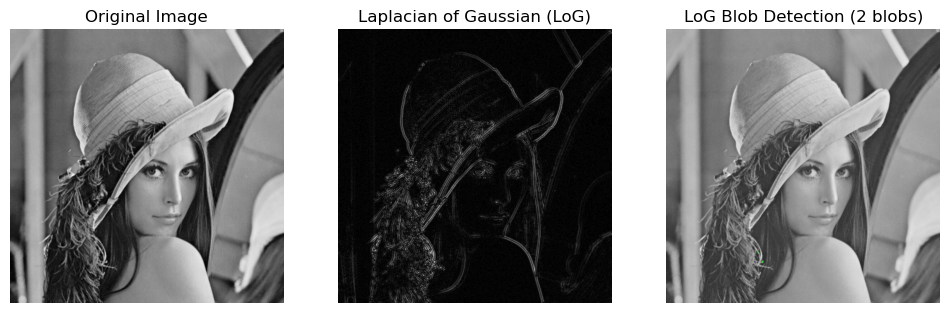

array([[[169, 169, 169],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [175, 175, 175],
        [162, 162, 162],
        [138, 138, 138]],

       [[169, 169, 169],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [175, 175, 175],
        [162, 162, 162],
        [138, 138, 138]],

       [[169, 169, 169],
        [169, 169, 169],
        [168, 168, 168],
        ...,
        [175, 175, 175],
        [162, 162, 162],
        [138, 138, 138]],

       ...,

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 59,  59,  59],
        ...,
        [115, 115, 115],
        [112, 112, 112],
        [114, 114, 114]],

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 64,  64,  64],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [122, 122, 122]],

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 64,  64,  64],
        ...,
        [117, 117, 117],
        [118, 118, 118],
        [122, 122, 122]]

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blob_detection_log(image_path, threshold=50):
    """
    Detects blobs in an image using the Laplacian of Gaussian (LoG) method.
    
    Parameters:
    - image_path: str, path to the input image.
    - threshold: int, threshold for binary segmentation after applying LoG.
    
    Returns:
    - result: Image with detected blobs drawn as contours.
    - contours: List of detected blob contours.
    """

    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError("Image not found. Check the file path.")

    # Apply Gaussian Blur to smooth the image and reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Laplacian operator
    log_result = cv2.Laplacian(blurred, cv2.CV_64F)

    # Convert to absolute values and normalize
    log_result = np.uint8(np.abs(log_result))

    # Apply binary thresholding to highlight blobs
    _, thresholded = cv2.threshold(log_result, threshold, 255, cv2.THRESH_BINARY)

    # Find contours (blobs)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert grayscale image to BGR for visualization
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)  # Draw contours in green

    # Display results using Matplotlib
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(log_result, cmap="gray")
    plt.title("Laplacian of Gaussian (LoG)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.title(f"LoG Blob Detection ({len(contours)} blobs)")
    plt.axis("off")

    plt.show()

    return result

# Example usage
blob_detection_log(r"D:\Lenna_(test_image).png")
